# Comparative Clustering of Shape and S-Set Datasets:

## S-sets:
Synthetic 2-d data with N=5000 vectors and k=15 Gaussian clusters with different degree of cluster overlap

P. Fränti and O. Virmajoki, "Iterative shrinking method for clustering problems", Pattern Recognition, 39 (5), 761-765, May 20

## Shape Sets:

### Pathbased 
N=300, k=3, D=2
 	Pathbased:  txt
H. Chang and D.Y. Yeung, Robust path-based spectral clustering. Pattern Recognition, 2008. 41(1): p. 191-2

### Spiral
N=312, k=3, D=2
 	Spiral:  txt
H. Chang and D.Y. Yeung, Robust path-based spectral clustering. Pattern Recognition, 2008. 41(1): p. 191-2


### Jain
N=373, k=2, D=2
 	Jain:  txt
A. Jain and M. Law, Data clustering: A user's dilemma. Lecture Notes in Computer Science, 2005. 3776: p. 1-


### Flame
N=240, k=2, D=2
 	Flame:  txt
L. Fu and E. Medico, FLAME, a novel fuzzy clustering method for the analysis of DNA microarray data. BMC bioinformatics, 2007. 8(1): p. 3.10.03.03.06

# Importing modules and datasets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
S1 = pd.read_csv("s1.txt",sep="\s+",header=None)
S4 = pd.read_csv("s4.txt",sep="\s+",header=None)

In [151]:
#Third row is label
pathbased = pd.read_csv("pathbased.txt",sep="\s+",header=None)
spiral = pd.read_csv("spiral.txt",sep="\s+",header=None)
jain = pd.read_csv("jain.txt",sep="\s+",header=None)
flame = pd.read_csv("flame.txt",sep="\s+",header=None)
spiral

0      1  2
0    31.95   7.95  3
1    31.15   7.30  3
2    30.45   6.65  3
3    29.70   6.00  3
4    28.90   5.55  3
..     ...    ... ..
307  15.75  13.85  2
308  15.65  14.05  2
309  15.65  14.25  2
310  15.65  14.50  2
311  15.65  14.60  2

[312 rows x 3 columns]

In [161]:
dfs= {"S1":[S1,15],
      "S4":[S4,15],
      "pathbased":[pathbased,3],
      "spiral":[spiral,3],
      "jain":[jain,2],
      "flame":[flame,2]
   
    
}
for df_name in dfs.keys():
    if df_name=="S1" or df_name=="S4":
        pass
    else:
        df=dfs[df_name][0]
        df.rename(columns={2:"true_cluster"},inplace=True)
        df['true_cluster']=df['true_cluster']-1 # Changing the labeling from 1...k to 0.. k-1 so it's compatible with deafualt of clustering algorithms

In [164]:
flame.true_cluster.unique()

array([0, 1], dtype=int64)

# Visualization


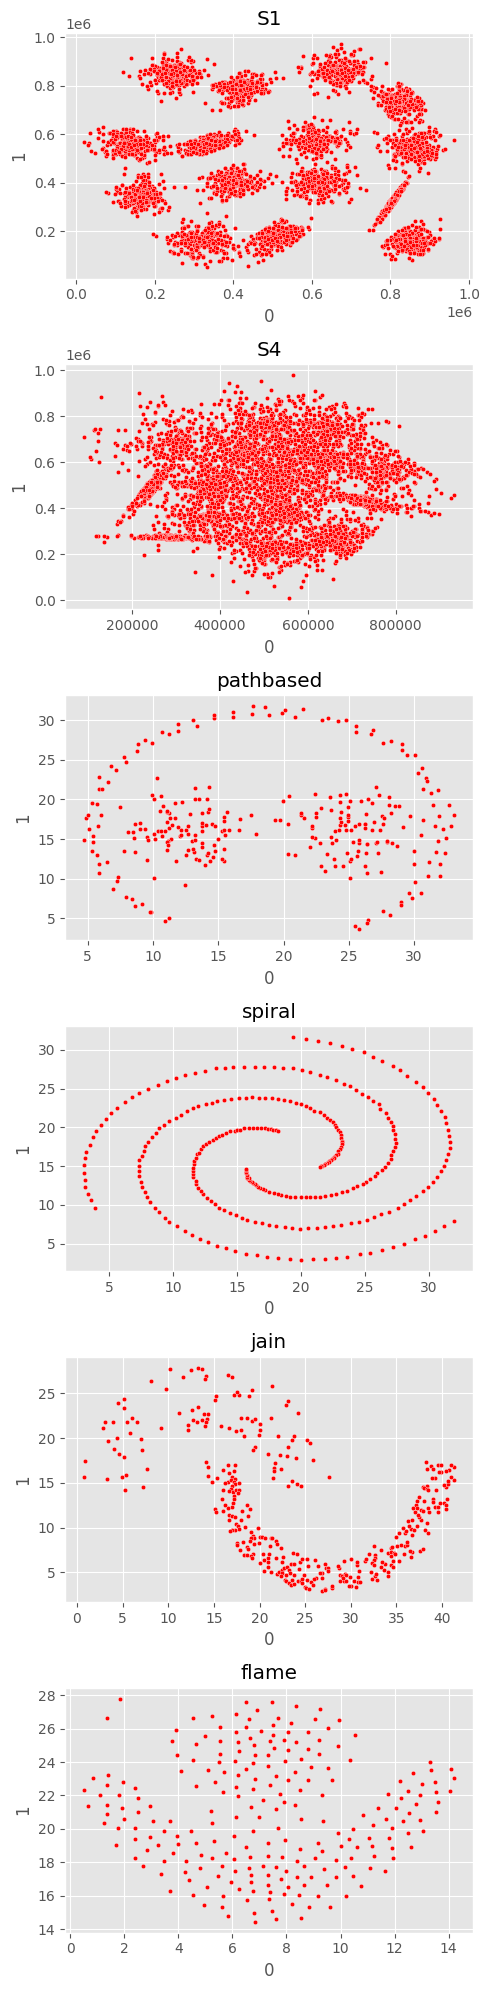

In [165]:
plt.style.use('ggplot')

fig,axs=plt.subplots(6,1,figsize=(5,20))
axs=axs.ravel()
i=0
for df in dfs.keys():
    axs[i].set_title(f'{df}')

    sns.scatterplot(x=0,y=1,data=dfs[df][0],ax=axs[i],color="r",s=10)
    i+=1
    fig.tight_layout()
    #plt.show()

In [166]:
flame

0      1  true_cluster
0    1.85  27.80             0
1    1.35  26.65             0
2    1.40  23.25             1
3    0.85  23.05             1
4    0.50  22.35             1
..    ...    ...           ...
235  7.50  26.20             0
236  7.50  25.65             0
237  7.05  25.85             0
238  6.90  27.15             0
239  6.15  26.90             0

[240 rows x 3 columns]

In [167]:
S1.columns

Index([0, 1], dtype='int64')

# Kmeans
<font size="4">
Kmeans tries to minimize within cluster variability. 
Within cluster variability is defined as sum of sqaured distance of each pair of data in a cluster. The Distance is defined as Euclidean Distance. 
The Optimization of this objective is not trivial. Instead in the K-means algorithm a local optimum is obtained by the following operation.

Initialization:

Samples are randomly assigned to a cluster
First Step:

Cluster Centroid is calculated (a vector with k dimensions each feature with the mean of samples in the cluster)

Second Step:
The observations that have the minimum distance to a centroid are assigned to that cluster 

First and Second Steps Are iterated
</font>.

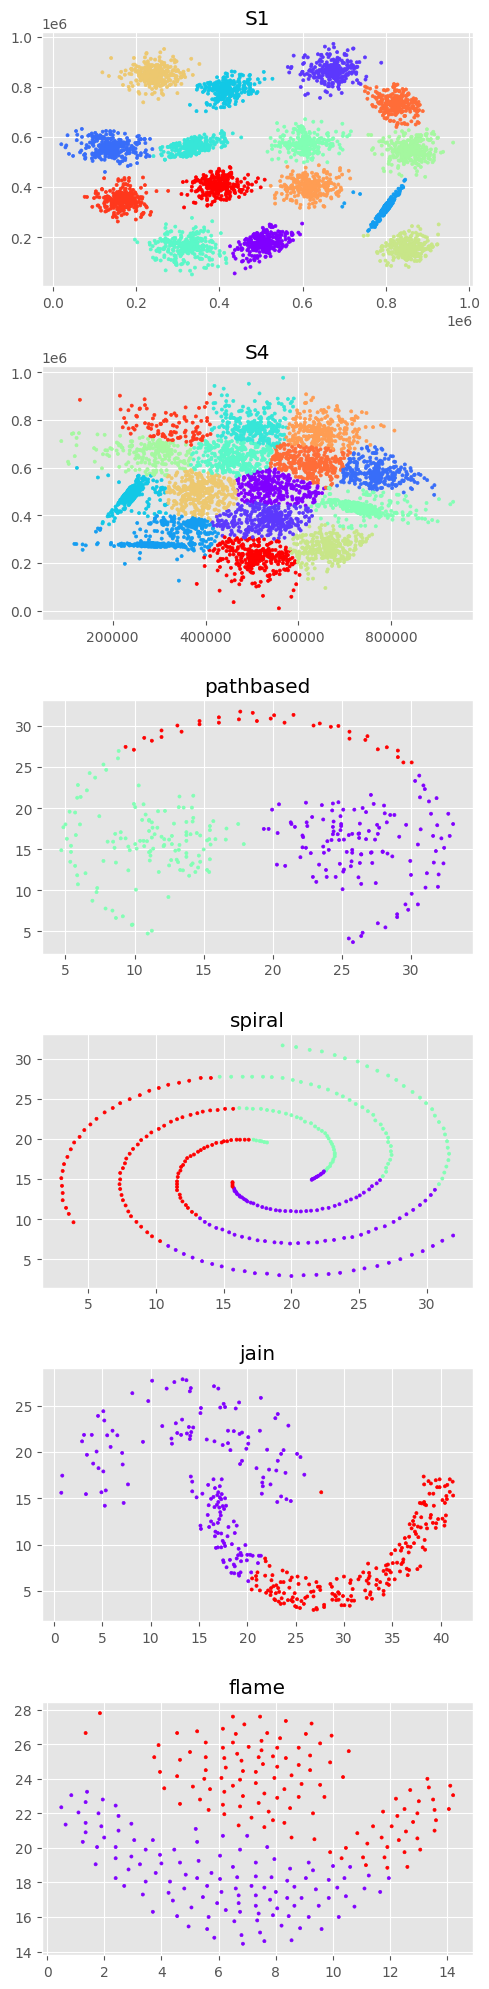

In [168]:
from sklearn.cluster import KMeans

fig,axs=plt.subplots(6,1,figsize=(5,20))
axs=axs.ravel()
i=0
for df_name in dfs.keys():
    dataset=dfs[df_name][0]
    k = dfs[df_name][1]
    
    kmeans=KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(dataset.loc[:,0:1])
    dataset["kmeans_cluster"]=kmeans.labels_
    axs[i].set_title(f'{df_name}')
    
    #sns.scatterplot(x=0,y=1,data=dataset,ax=axs[i],hue='kmeans_cluster',s=10)
    axs[i].scatter(x=dataset.loc[:,0],y=dataset.loc[:,1],c=dataset.loc[:,'kmeans_cluster'],cmap='rainbow',s=5)
    i+=1
    fig.tight_layout()
    #plt.show()

# Hierarchial Clustering
<font size='4'>
Two Dissimilarity measures need to be defined here:<br>
Metric : is a measure of distance of two observations. could be euclidean,l1,l2, correlation based and etc. <br>
Linkage: is about how we find the dissimilarity between two groups of observations.<br>
Ward: minimizes the variance of clusters <br>
Single: calculates pairwise distances of observations of two clusters and considers the smallest one<br>
Complete: calculates pairwise distances of observations of two clusters and considers the largest one<br>
Average: calculates pairwise distances of observations of two clusters and averages them<br>
Centroid: Dissimilarity between center of one cluster and the center of the other cluster. Center is a mean feature vector of dim p<br>

#### Documentation of Scikit learn

Metric : str or callable, default=None
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed". If set to `None` then
    "euclidean" is used. If linkage is "ward", only "euclidean" is
    accepted. If "precomputed", a distance matrix is needed as input for
    the fit method.


linkage : {'ward', 'complete', 'average', 'single'}, default='ward'
    Which linkage criterion to use. The linkage criterion determines which
    distance to use between sets of observation. The algorithm will merge
    the pairs of cluster that minimize this criterion.

- ward minimizes the variance of the clusters being merged.
- average uses the average of the distances of each observation of
  the two sets.
- complete or maximum linkage uses the maximum distances between
  all observations of the two sets.
- single uses the minimum of the distances between all observations
  of the two sets

     
</font>

## Average Linkage

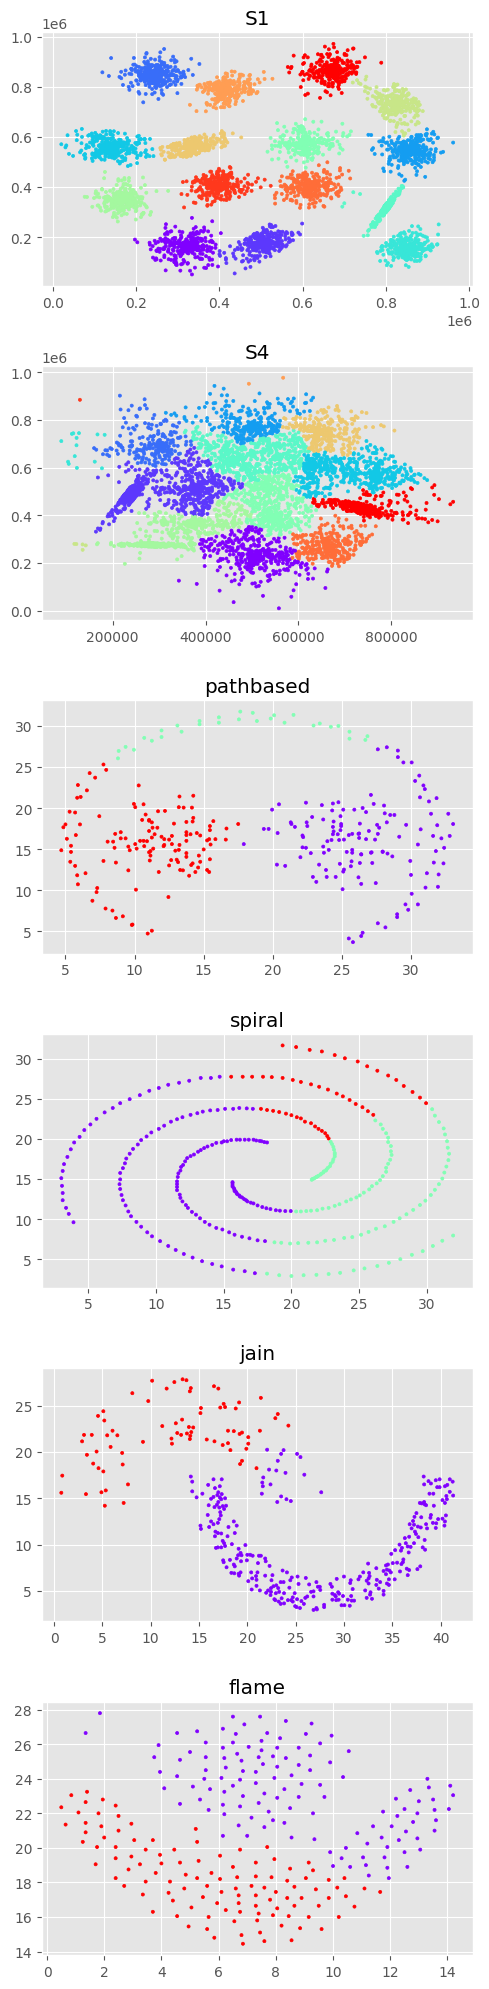

In [169]:
from sklearn.cluster import AgglomerativeClustering

fig,axs=plt.subplots(6,1,figsize=(5,20))
axs=axs.ravel()
i=0
for df_name in dfs.keys():
    dataset=dfs[df_name][0]
    k = dfs[df_name][1]
    
    hierarchical_cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage="average")
    labels = hierarchical_cluster.fit_predict(dataset.loc[:,0:1])
    dataset["avg_hcluster"]= labels
    axs[i].set_title(f'{df_name}')
    
    #sns.scatterplot(x=0,y=1,data=dataset,ax=axs[i],hue='kmeans_cluster',s=10)
    axs[i].scatter(x=dataset.loc[:,0],y=dataset.loc[:,1],c=labels,cmap='rainbow',s=5)
    i+=1
    fig.tight_layout()
    #plt.show()

## Single Linkage

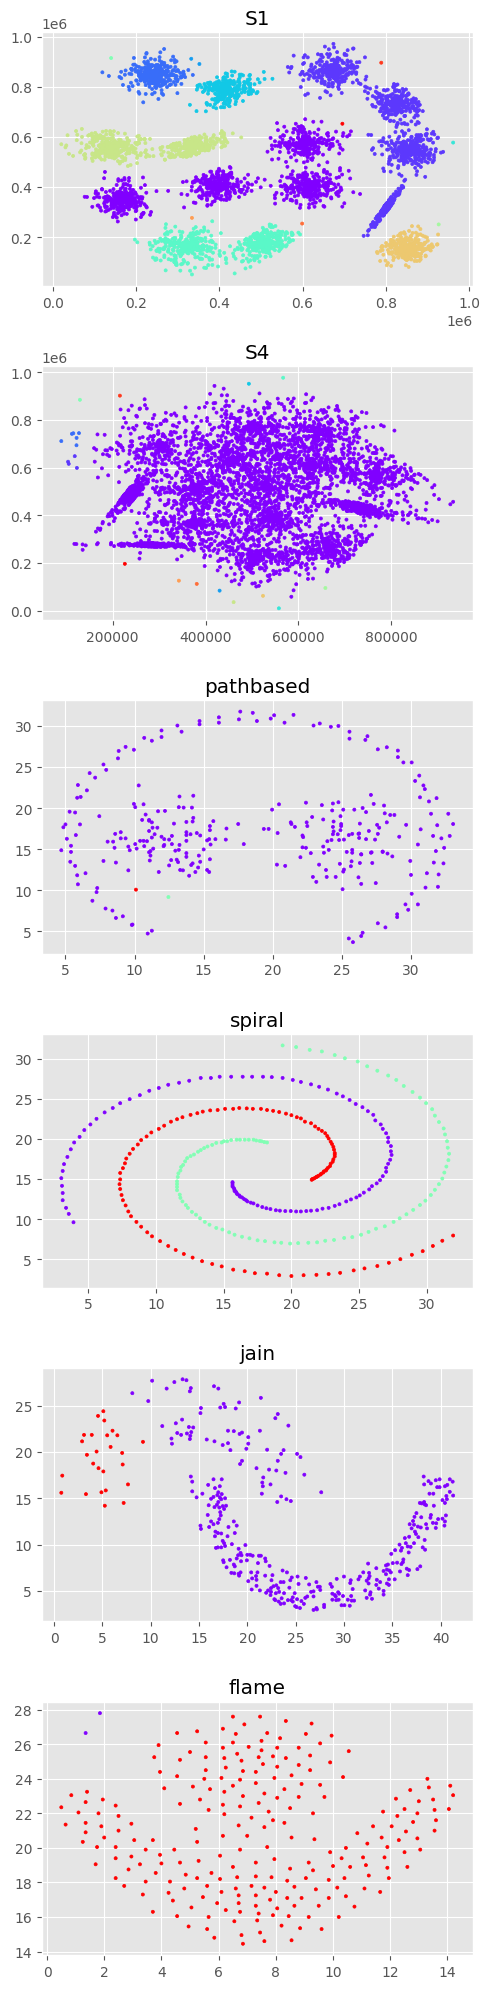

In [170]:
from sklearn.cluster import AgglomerativeClustering

fig,axs=plt.subplots(6,1,figsize=(5,20))
axs=axs.ravel()
i=0
for df_name in dfs.keys():
    dataset=dfs[df_name][0]
    k = dfs[df_name][1]
    
    hierarchical_cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage="single")
    labels = hierarchical_cluster.fit_predict(dataset.loc[:,0:1])
    dataset["single_hcluster"]= labels
    axs[i].set_title(f'{df_name}')
    
    #sns.scatterplot(x=0,y=1,data=dataset,ax=axs[i],hue='kmeans_cluster',s=10)
    axs[i].scatter(x=dataset.loc[:,0],y=dataset.loc[:,1],c=labels,cmap='rainbow',s=5)
    i+=1
    fig.tight_layou+t()
    #plt.show()

## Complete Linkage

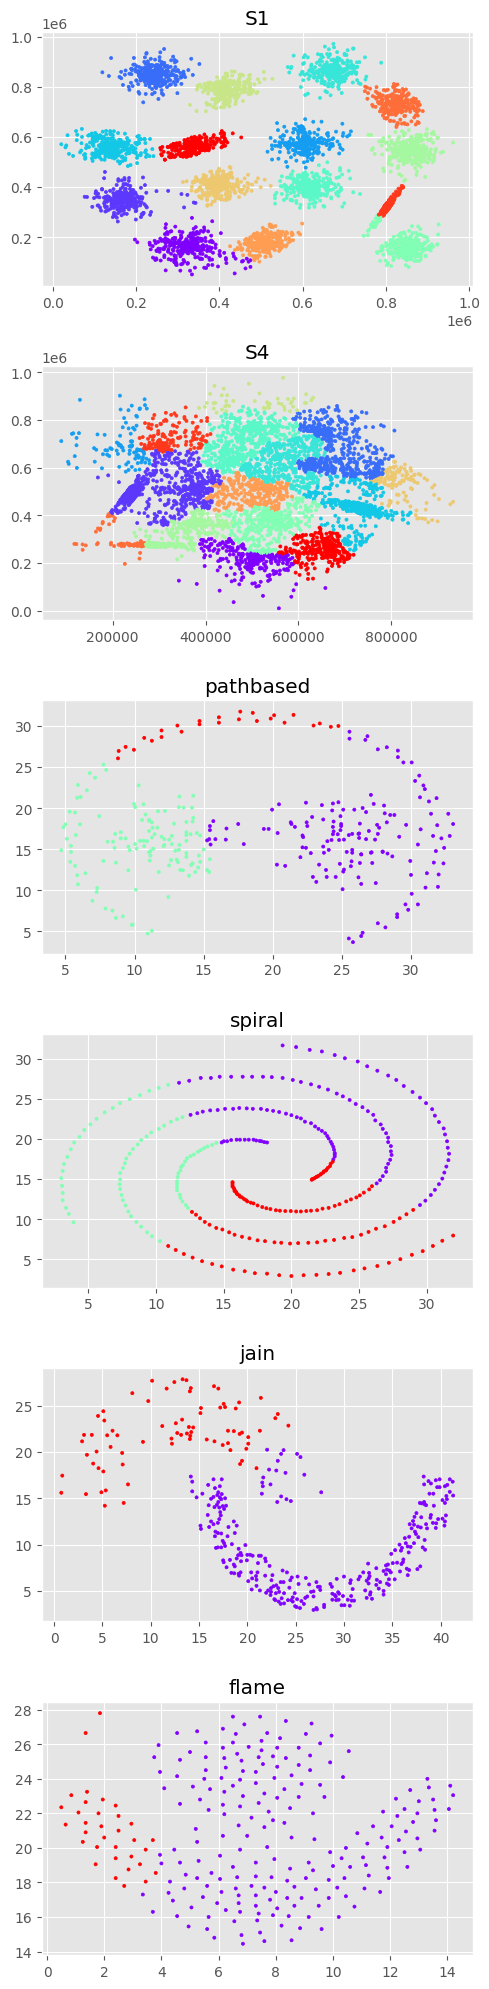

In [171]:
from sklearn.cluster import AgglomerativeClustering

fig,axs=plt.subplots(6,1,figsize=(5,20))
axs=axs.ravel()
i=0
for df_name in dfs.keys():
    dataset=dfs[df_name][0]
    k = dfs[df_name][1]
    
    hierarchical_cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage="complete")
    labels = hierarchical_cluster.fit_predict(dataset.loc[:,0:1])
    dataset["complete_hcluster"]= labels
    axs[i].set_title(f'{df_name}')
    
    #sns.scatterplot(x=0,y=1,data=dataset,ax=axs[i],hue='kmeans_cluster',s=10)
    axs[i].scatter(x=dataset.loc[:,0],y=dataset.loc[:,1],c=labels,cmap='rainbow',s=5)
    i+=1
    fig.tight_layout()
    #plt.show()

# Spectral Clustering
<font size='4'>
For this algorithm a similarity graph must be constructed. In this graph the edges represent the similarity between nodes (objects).
Similar nodes are connected and the edge weight represents the similarity and if the similarity between two nodes is not above a certain
threshold, they don't get connected.<br>
In this case the problem boils down to a graph partition problem, where we have to get the connected components of the graph such that edges in each component have high weight and edges between components have low weight.<br>
Two metrics should be defined here: <br>
1-The measure of similarity between nodes:  <br>
It's usually defined as $ s(xi, xj) = exp(-(xi-xj)^2/c)$ <br>


2- How we construct the graph similarity <br>:- Mutual K-nearest-neighbor graph: If node $v_{i}$ and $v_j$ are both k-nearest neighbors of each other, they are connected and $w_{ij} = s_{ij}$
- Fully connected graph: connect all points and weight each edge with $s_{ij}$
- eplison neighborhood graph

</font>

affinity : str or callable, default='rbf'
    How to construct the affinity matrix.
     - 'nearest_neighbors': construct the affinity matrix by computing a
       graph of nearest neighbors.
     - 'rbf': construct the affinity matrix using a radial basis function
       (RBF) kernel.

In [1]:
from sklearn.cluster import SpectralClustering
spectral_cluster = SpectralClustering(n_clusters=k, affinity="nearest_neighbors")


D:\Python3.11\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


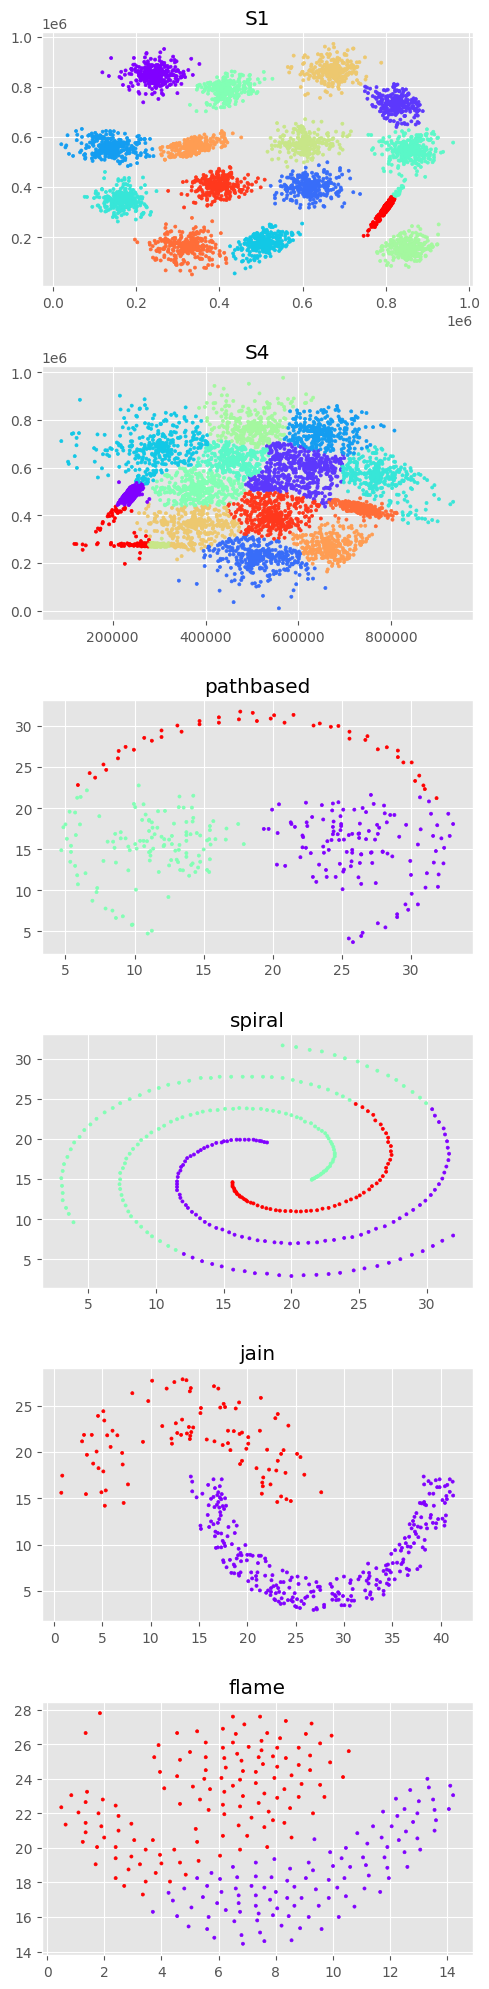

In [172]:
from sklearn.cluster import SpectralClustering

fig,axs=plt.subplots(6,1,figsize=(5,20))
axs=axs.ravel()
i=0
for df_name in dfs.keys():
    dataset=dfs[df_name][0]
    k = dfs[df_name][1]
    
    spectral_cluster = SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
    spectral_cluster.fit(dataset.loc[:,0:1])
    dataset["spectral_cluster"]= spectral_cluster.labels_
    axs[i].set_title(f'{df_name}')
    
    #sns.scatterplot(x=0,y=1,data=dataset,ax=axs[i],hue='kmeans_cluster',s=10)
    axs[i].scatter(x=dataset.loc[:,0],y=dataset.loc[:,1],c=dataset["spectral_cluster"],cmap='rainbow',s=5)
    i+=1
    fig.tight_layout()
    #plt.show()

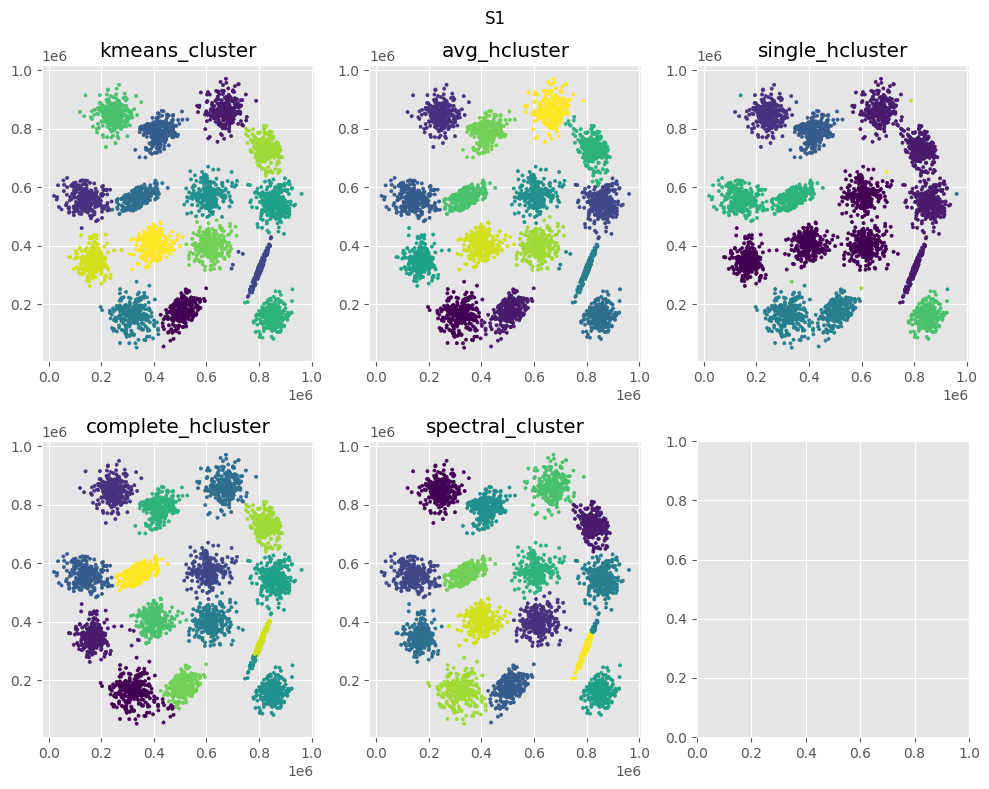

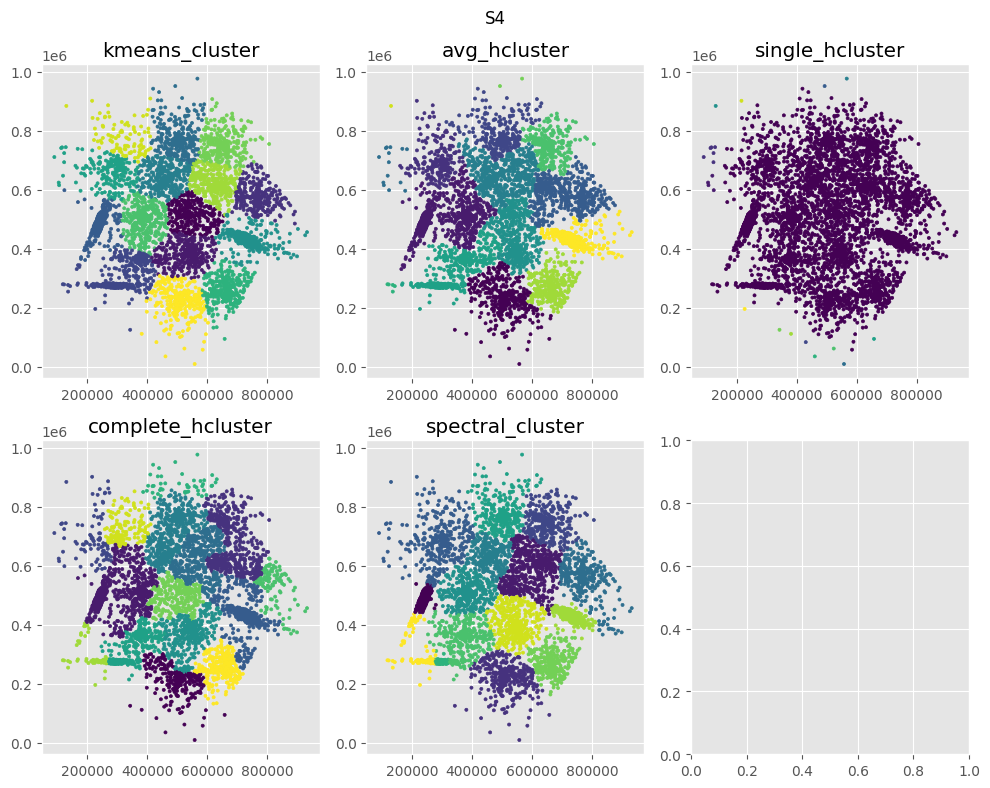

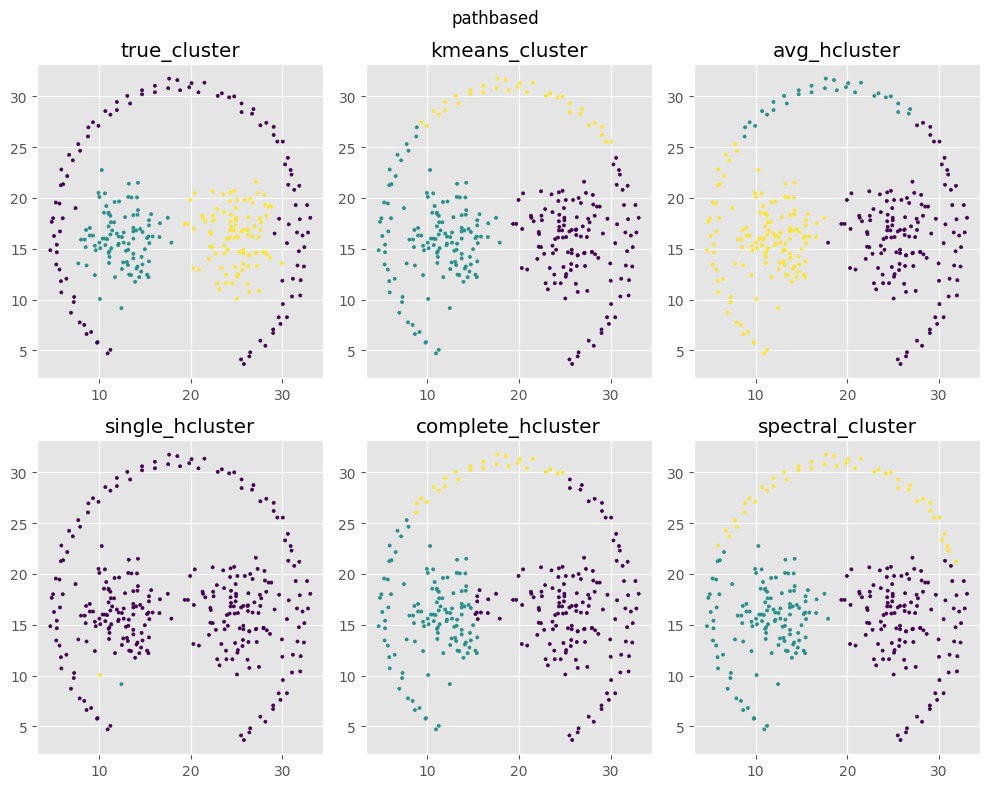

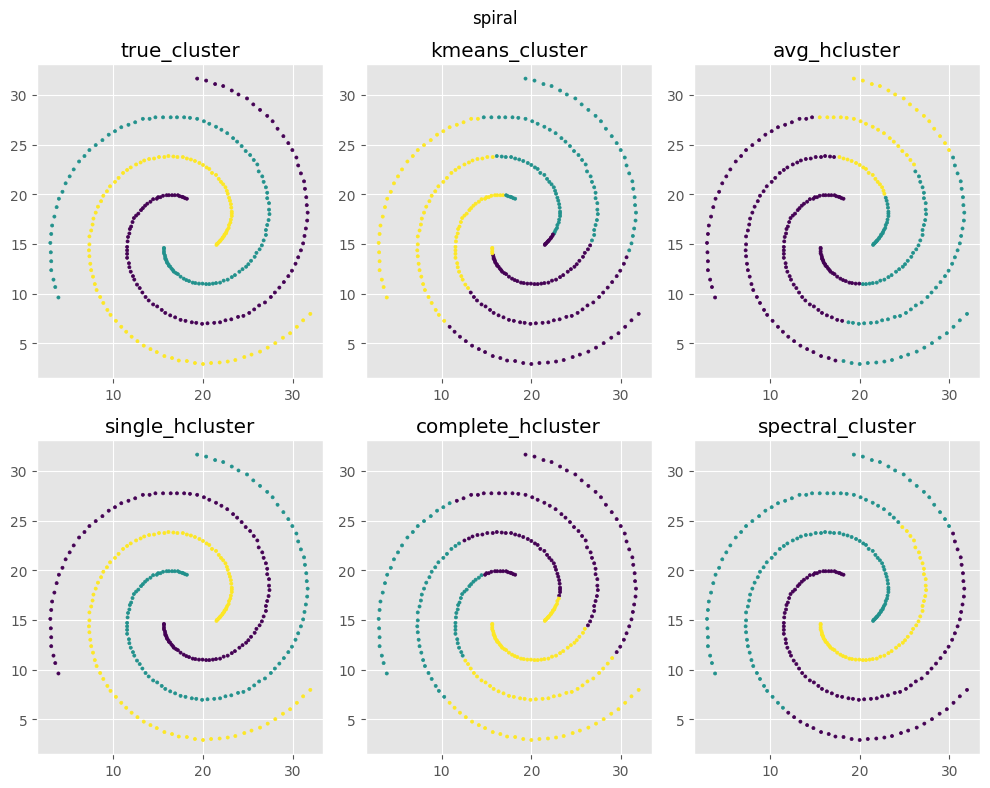

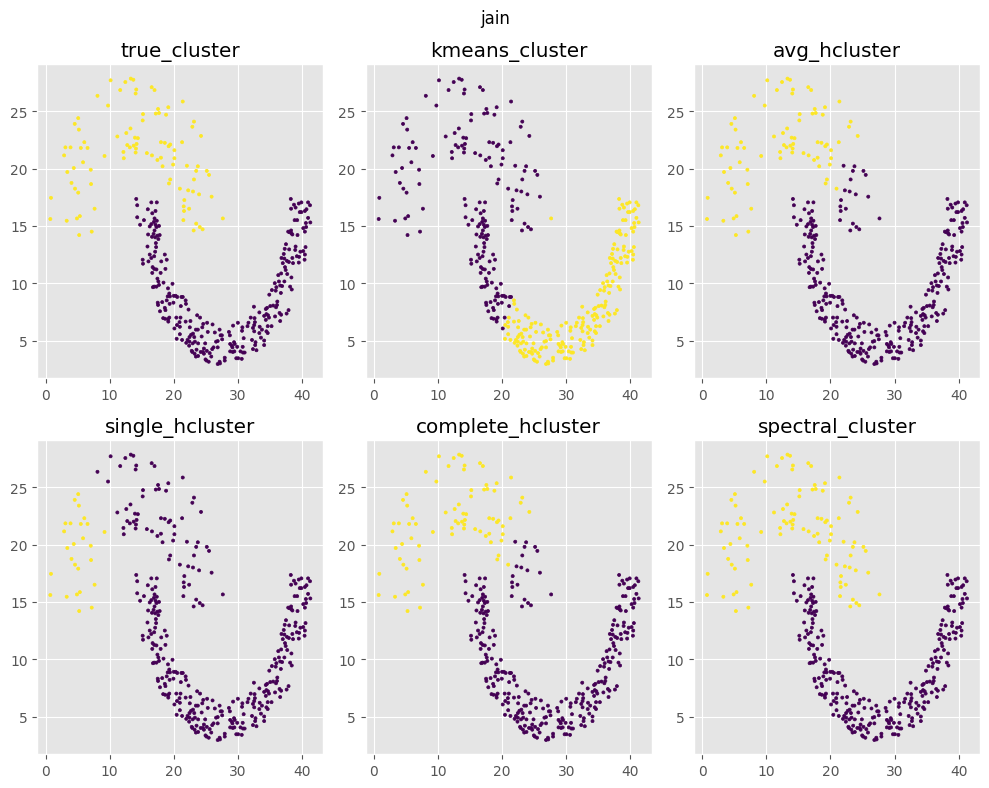

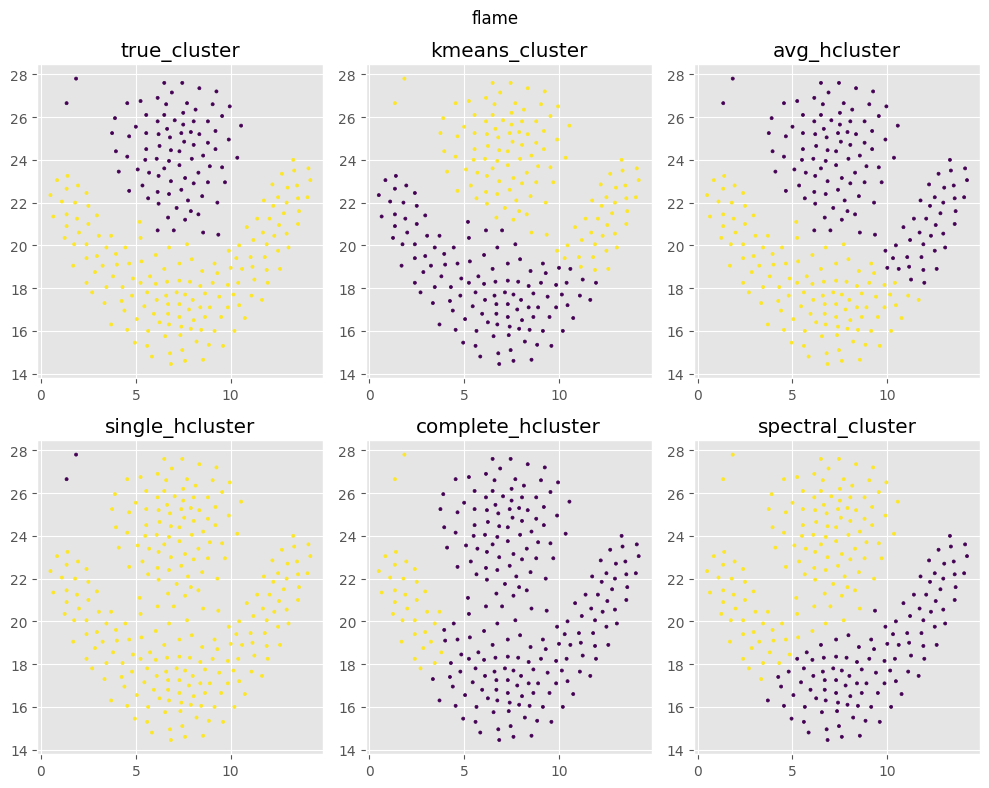

In [184]:
for df_name in dfs.keys():

    fig,axs=plt.subplots(2,3,figsize=(10,8))
    axs=axs.ravel()
    dataset=dfs[df_name][0]
    k = dfs[df_name][1]
    fig.suptitle(f"{df_name}")
    for i in range(6):
        try:

            axs[i].set_title(f'{dataset.iloc[:,i+2].name}')
            
            #sns.scatterplot(x=0,y=1,data=dataset,ax=axs[i],hue='kmeans_cluster',s=10)
            #print(f"x:{x}\ny:{y}")
            axs[i].scatter(x=dataset.loc[:,0],y=dataset.loc[:,1],c=dataset.iloc[:,i+2],cmap='viridis',s=5)
        except:
            pass
        fig.tight_layout()
        
        #plt.show()

# Purity index :
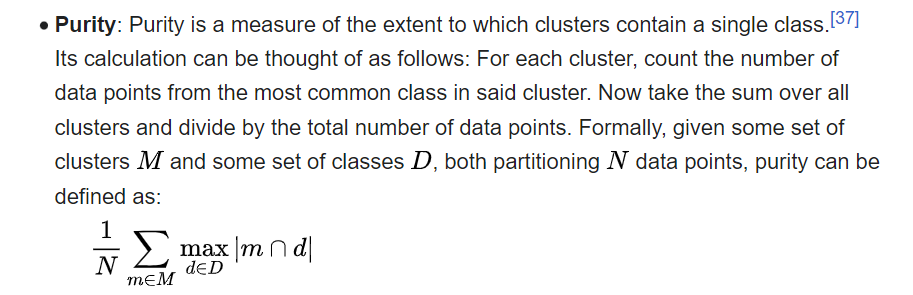

<Figure size 640x480 with 0 Axes>

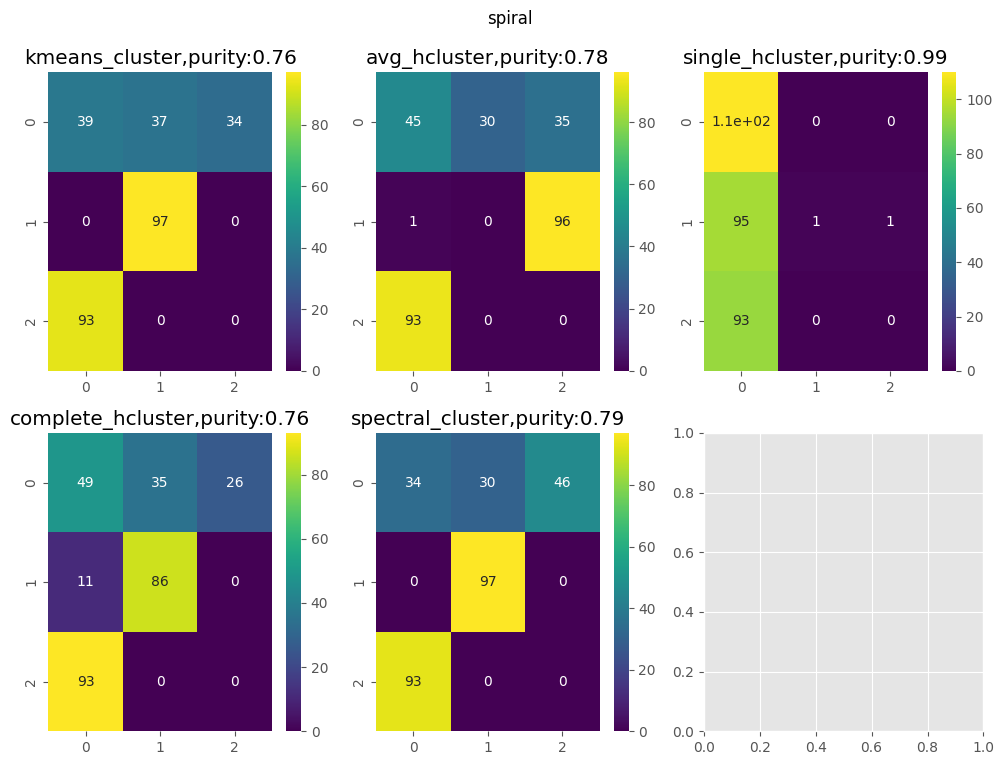

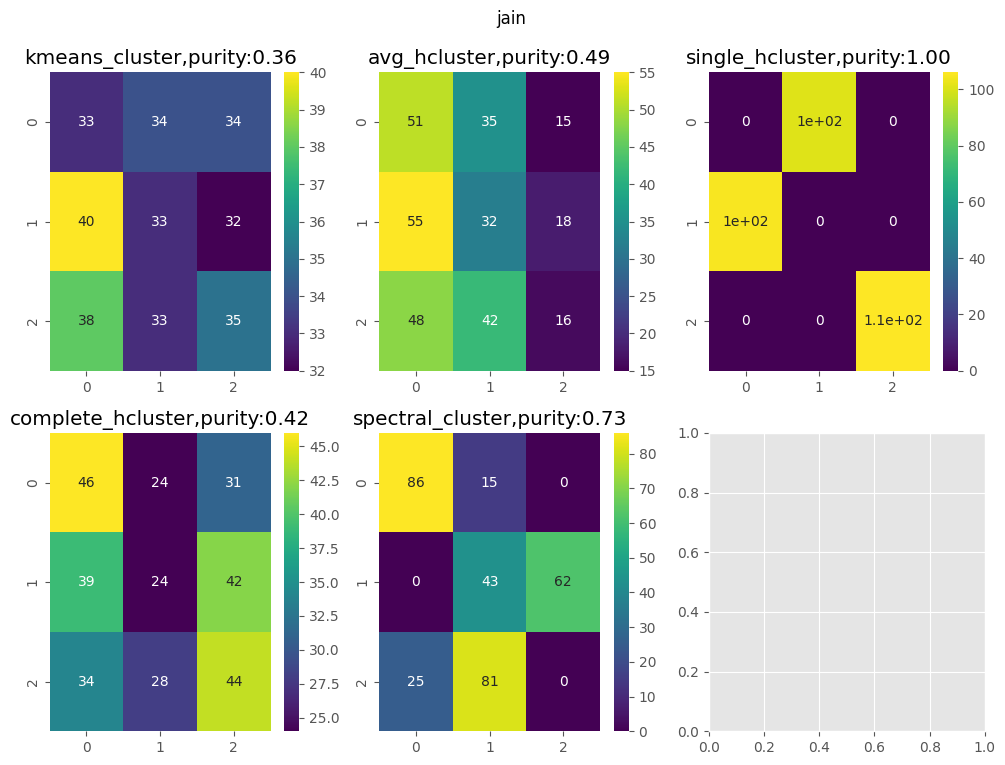

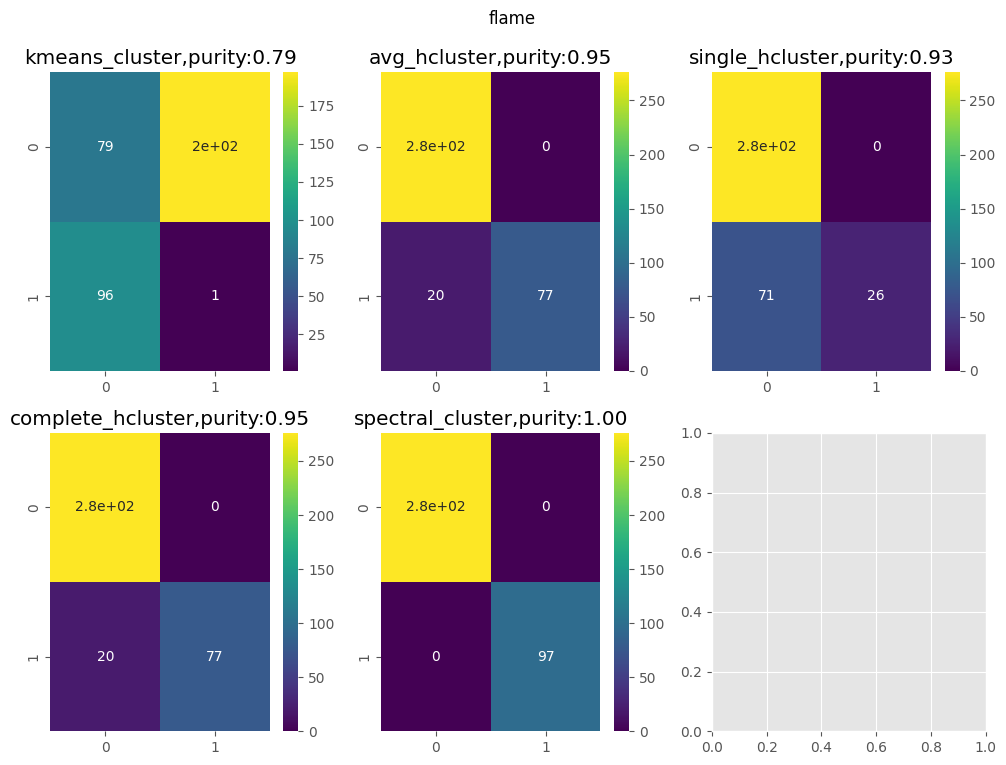

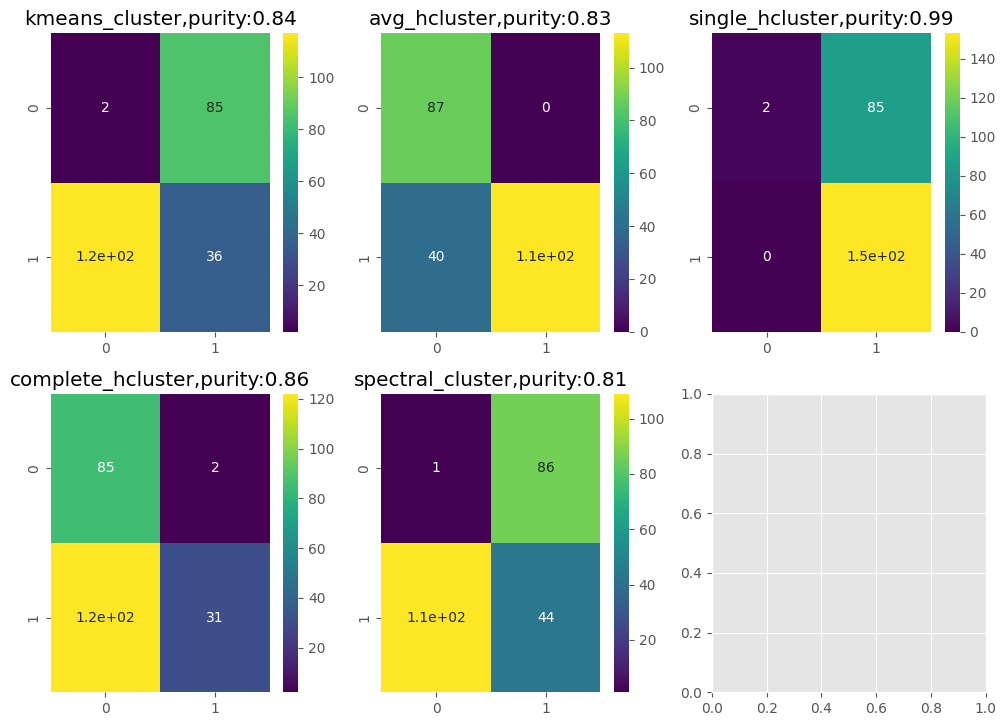

In [176]:
from sklearn.metrics import confusion_matrix,classification_report
for df_name in dfs.keys():
    if df_name=="S1" or df_name=="S4":
        continue
    dataset=dfs[df_name][0]
    k = dfs[df_name][1]
    N= len(dataset)
    true= dataset.true_cluster
    #print()
    plt.suptitle(f"{df_name}")
    fig,axs=plt.subplots(2,3,figsize=(10,8))
    axs=axs.ravel()
    for i in range(5):
        predicted=dataset.iloc[:,i+3]
        confusion_mat=confusion_matrix(true, predicted)
        #print(confusion_mat)
        purity= np.sum(np.amax(confusion_mat,axis=1))/len(dataset)
        #print(f"Purity Index of {dataset.iloc[:,i+3].name}:{purity}")       
        axs[i].set_title(f"{dataset.iloc[:,i+3].name},purity:{purity:.2f}")
        
        sns.heatmap(confusion_mat,ax=axs[i],annot=True,cmap="viridis")
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])


# Rand index :
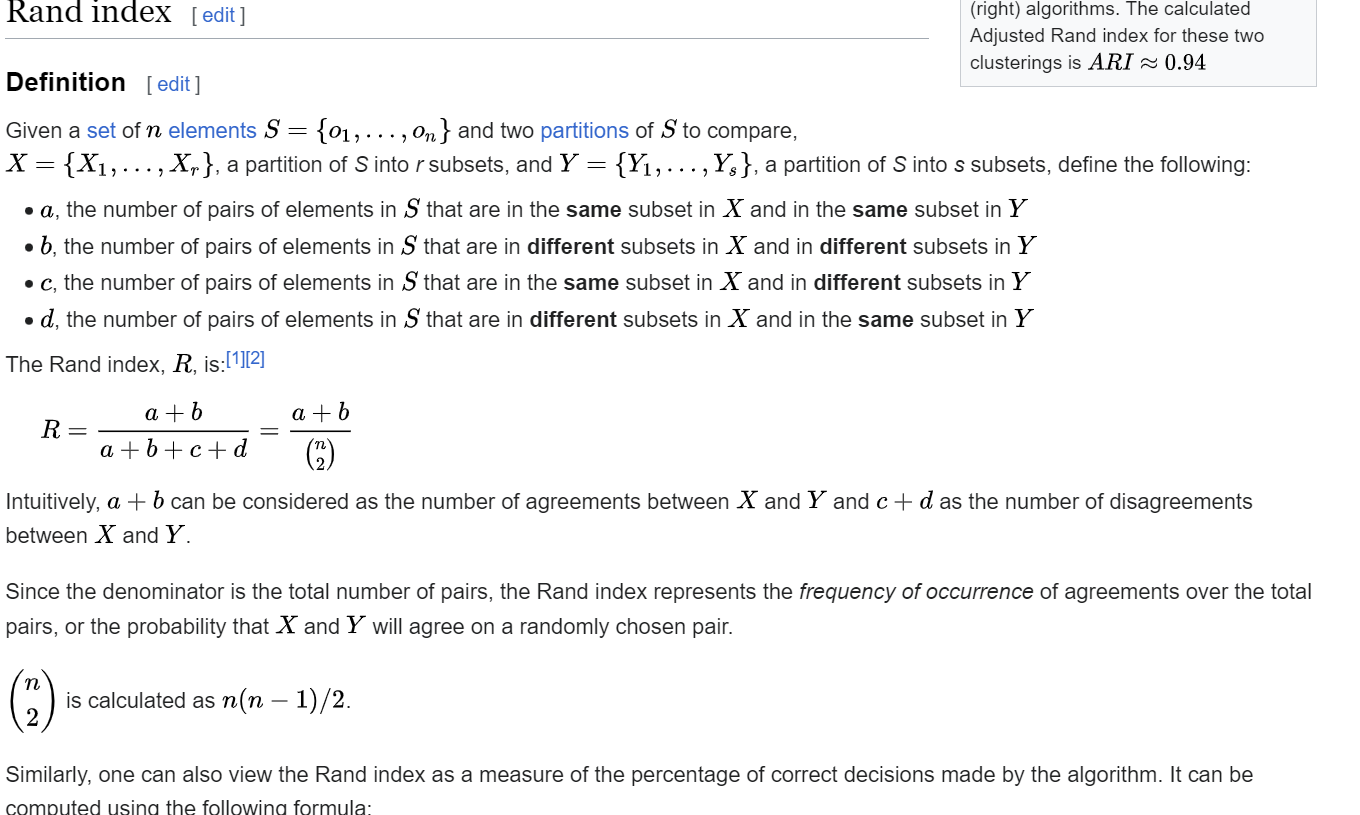
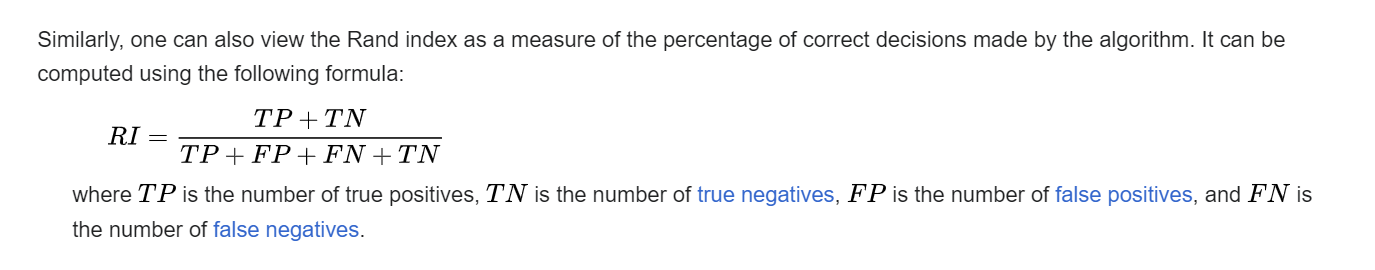

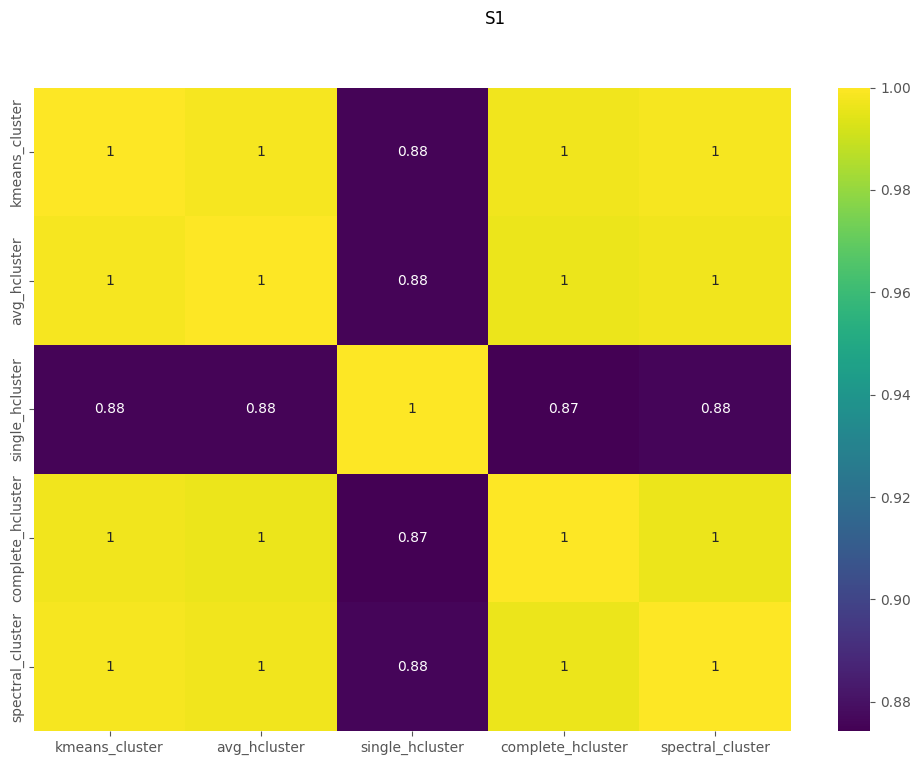

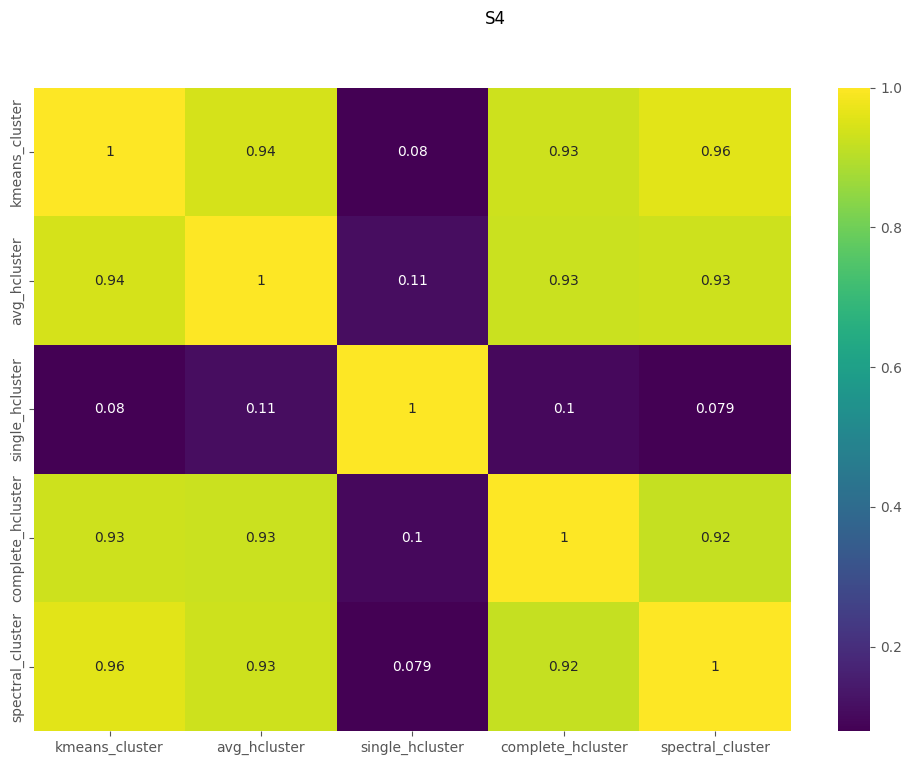

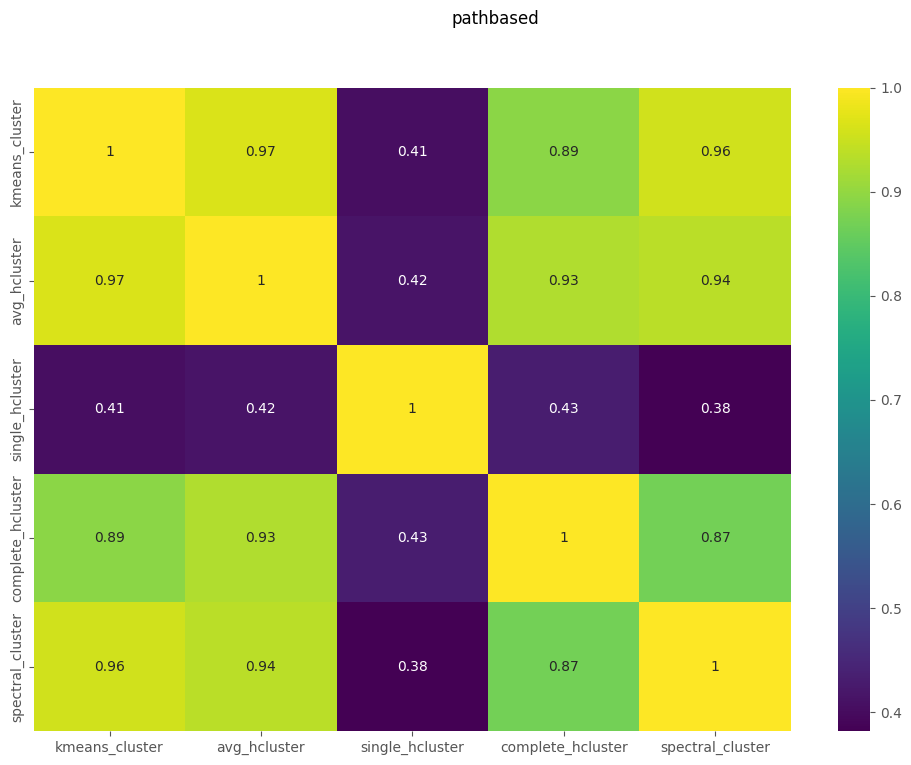

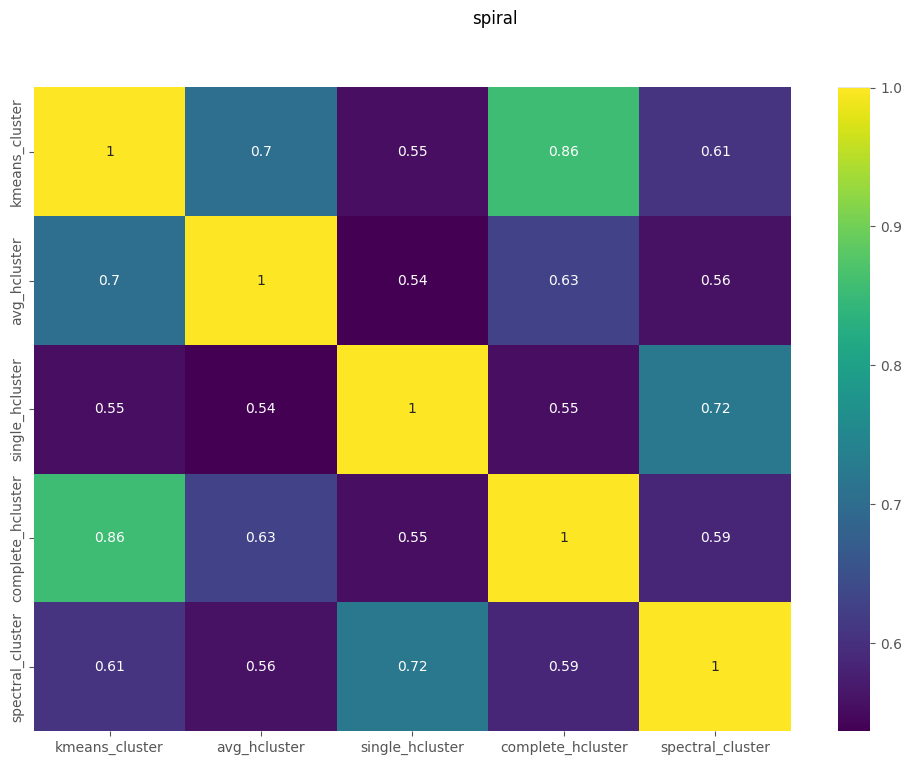

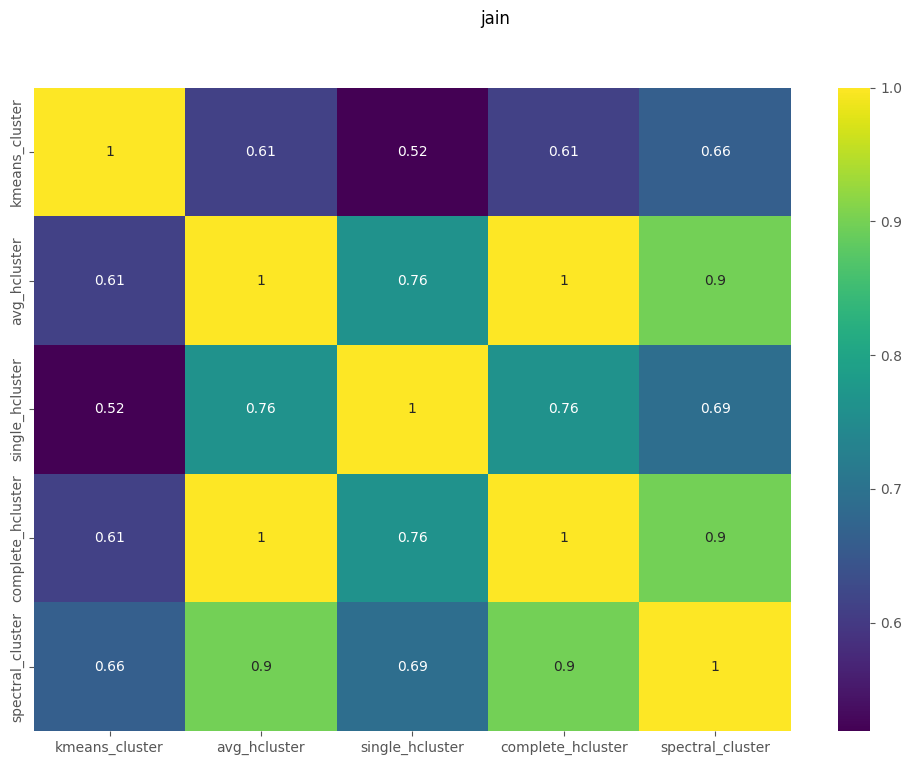

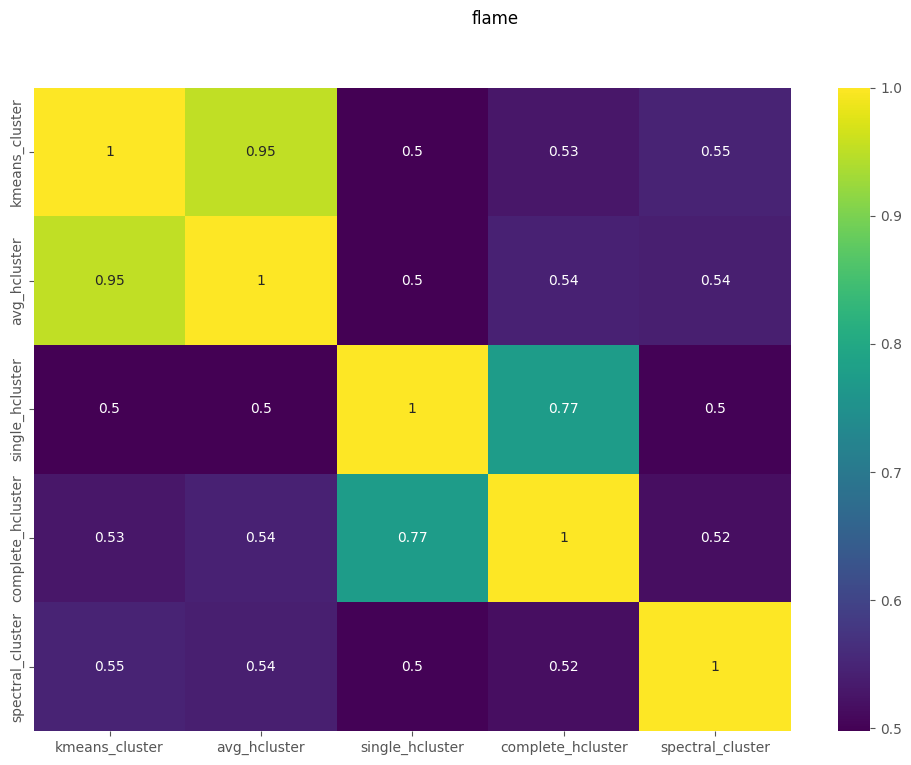

In [183]:
from sklearn.metrics.cluster import rand_score
methods=S1.columns[2:]
for df_name in dfs.keys():
    dataset=dfs[df_name][0]
    k = dfs[df_name][1]
    N= len(dataset)
    fig,axs=plt.subplots(1,1,figsize=(10,8))
    randind_mat=np.zeros((5,5))
    for i in range(5):
        for j in range(5):
            randind_mat[i,j]= rand_score(dataset.loc[:,methods[i]],dataset.loc[:,methods[j]])
        
    
    sns.heatmap(randind_mat,annot=True,cmap="viridis",xticklabels=methods,yticklabels=methods)
    fig.suptitle(f"{df_name}")

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    

# References

## Websites:

1-
https://www.w3schools.com/python/python_ml_k-means.asp

2- https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp

3- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

4- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

5- https://stats.stackexchange.com/questions/95731/how-to-calculate-purity